In [1]:
import cv2 as cv
from tqdm import tqdm
from tqdm import tnrange
import numpy as np
from IPython.display import Image


In [2]:
pNum = "T000001"

proj = "/root/proj/SecurityAI_Round1"
pimg = f"{proj}/Data/images"
pmdl = f"{proj}/Model"
pout = f"{proj}/Out/{pNum}"

In [3]:
# st, ed = 1, 100
st, ed = 1, 712


In [4]:
def f_lcos(f1, f2):
    df1 = [np.average(i) for i in f1]
    df2 = [np.average(i) for i in f2]
    return 1 - np.dot(df1/np.linalg.norm(df1, 2), df2/np.linalg.norm(df2, 2))

print("SAME:%.6f" % f_lcos(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00001.jpg")))
print("DIFF:%.6f" % f_lcos(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00002.jpg")))
print("DIFF:%.6f" % f_lcos(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00406.jpg")))

%time f_lcos(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00002.jpg"))


SAME:0.000000
DIFF:0.073383
DIFF:0.004231
CPU times: user 3.12 ms, sys: 29 µs, total: 3.15 ms
Wall time: 2.93 ms


0.07338285522785237

In [5]:
def f_lf1(f1, f2):
    return np.sqrt(np.sum(np.square(f1 - f2)))

print("SAME:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00001.jpg")))
print("DIFF:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00002.jpg")))
print("DIFF:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00406.jpg")))

%time f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00002.jpg"))


SAME:0.000000
DIFF:1974.158302
DIFF:1993.636627
CPU times: user 1.04 ms, sys: 9 µs, total: 1.05 ms
Wall time: 1.06 ms


1974.1583016566833

In [6]:
"""
简单思路
    1\根据L2距离找出最近人脸；
    2\根据clip限制M68取结果；
    # 是否可以考虑放大；
"""

def frun(tpath, time):
    n = 2
    
    for i in tnrange(st, ed+1, desc=f"{time}"):
        pi = f"{pimg}/"+f"00000{i}"[-5:]+".jpg"
        op = f"{pout}/images/"+f"00000{i}"[-5:]+".jpg"

        img = cv.imread(pi)
        imgj, min_p012 = 1, 99999.0

        for imgi in range(st, ed+1, 1):
            imgx = cv.imread(tpath+f"00000{imgi}"[-5:]+".jpg")
            p012 = f_lf1(img, imgx)

            if p012 < min_p012 and imgi != i:
                imgj, min_p012 = imgi, p012

        print(f"{i},{imgj}, Avg:{min_p012:.{6}}")
        
        img_g = cv.imread(tpath+f"00000{imgj}"[-5:]+".jpg")
        img_o = np.clip(img_g, img-25.5, img+25.5)
        cv.imwrite(op, img_o)

frun(f"{pimg}/", 0)


1,679, Avg:1874.62
2,22, Avg:1844.85
3,318, Avg:1952.25
4,20, Avg:1910.31
5,118, Avg:1911.88
6,245, Avg:1882.96
7,284, Avg:1932.02
8,675, Avg:1868.55
9,561, Avg:1890.75
10,219, Avg:1905.06
11,306, Avg:1910.19
12,160, Avg:1932.21
13,299, Avg:1924.5
14,523, Avg:1896.77
15,93, Avg:1899.68
16,664, Avg:1904.13
17,273, Avg:1890.84
18,101, Avg:1880.28
19,665, Avg:1874.47
20,487, Avg:1900.78
21,30, Avg:1904.6
22,2, Avg:1844.85
23,600, Avg:1899.23
24,155, Avg:1916.31
25,665, Avg:1912.92
26,435, Avg:1929.15
27,626, Avg:1895.29
28,23, Avg:1932.63
29,318, Avg:1927.85
30,61, Avg:1882.27
31,154, Avg:1940.12
32,261, Avg:1929.46
33,286, Avg:1942.14
34,588, Avg:1902.31
35,199, Avg:1930.73
36,572, Avg:1862.31
37,581, Avg:1907.97
38,121, Avg:1912.52
39,481, Avg:1872.65
40,356, Avg:1899.25
41,169, Avg:1882.27
42,71, Avg:1843.78
43,493, Avg:1896.94
44,46, Avg:1911.96
45,496, Avg:1899.78
46,384, Avg:1863.51
47,565, Avg:1878.24
48,427, Avg:1882.97
49,658, Avg:1919.52
50,600, Avg:1851.5
51,588, Avg:1909.51
52

402,462, Avg:1892.73
403,545, Avg:1912.61
404,520, Avg:1896.92
405,376, Avg:1909.28
406,434, Avg:1865.06
407,665, Avg:1810.43
408,77, Avg:1890.48
409,612, Avg:1933.88
410,625, Avg:1803.21
411,631, Avg:1923.57
412,401, Avg:1890.38
413,483, Avg:1894.64
414,177, Avg:1921.72
415,497, Avg:1925.6
416,342, Avg:1903.23
417,690, Avg:1875.75
418,358, Avg:1838.75
419,478, Avg:1915.6
420,427, Avg:1937.79
421,281, Avg:1883.63
422,286, Avg:1932.21
423,543, Avg:1933.11
424,261, Avg:1905.71
425,123, Avg:1941.09
426,502, Avg:1883.07
427,304, Avg:1858.66
428,157, Avg:1902.41
429,591, Avg:1858.39
430,477, Avg:1827.9
431,573, Avg:1900.71
432,382, Avg:1946.46
433,161, Avg:1900.24
434,406, Avg:1865.06
435,327, Avg:1907.54
436,578, Avg:1810.96
437,382, Avg:1878.74
438,272, Avg:1915.83
439,311, Avg:1900.58
440,505, Avg:1838.92
441,682, Avg:1916.77
442,658, Avg:1890.43
443,382, Avg:1872.03
444,481, Avg:1918.19
445,679, Avg:1898.49
446,234, Avg:1855.22
447,524, Avg:1898.1
448,312, Avg:1924.15
449,561, Avg:1912.

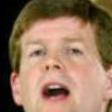

In [7]:
Image(filename=f"{pimg}/00001.jpg", width=300, height=300)

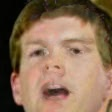

In [8]:
Image(filename=f"{pout}/images/00001.jpg", width=300, height=300)

In [9]:
# cosin相似度（余弦相似度）
# https://blog.csdn.net/weixin_39121325/article/details/84187453
